# Anomaly Detection in Aerospace Flight Telemetry Data

### Objective

Build a simple method to detect anomalies in aerospace flight telemetry data to identify potential security threats or abnormal behavior in the data collected from aerospace systems during flights.

Dataset obtained from: https://opendatalab.com/Data_Collected_with_Package_etc

#### STEP 1: Import Libraries

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### STEP 2: Load Dataset

In [24]:
# Load the dataset
data = pd.read_csv('flights.csv')

#### STEP 3: Data Preprocessing

In [25]:
# Specify the features for anomaly detection
features = ['wind_speed', 'wind_angle', 'battery_voltage', 'battery_current', 'position_x', 'position_y', 'position_z', 'orientation_x', 
            'orientation_y', 'orientation_z', 'orientation_w', 'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y', 'angular_z',
            'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z', 'speed',
            'payload', 'altitude']

In [26]:
# Create a new DataFrame with selected features
df = data[features]

#### STEP 4: Detect Anomalies

In [27]:
# Simple anomaly detection using Z-score
def detect_anomalies_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    return z_scores > threshold

In [28]:
# Apply anomaly detection to each feature
anomalies = df.apply(detect_anomalies_zscore)

#### STEP 5: Visualize Anomalies

In [29]:
# Summarize the number of anomalies for each feature
anomaly_counts = anomalies.sum()

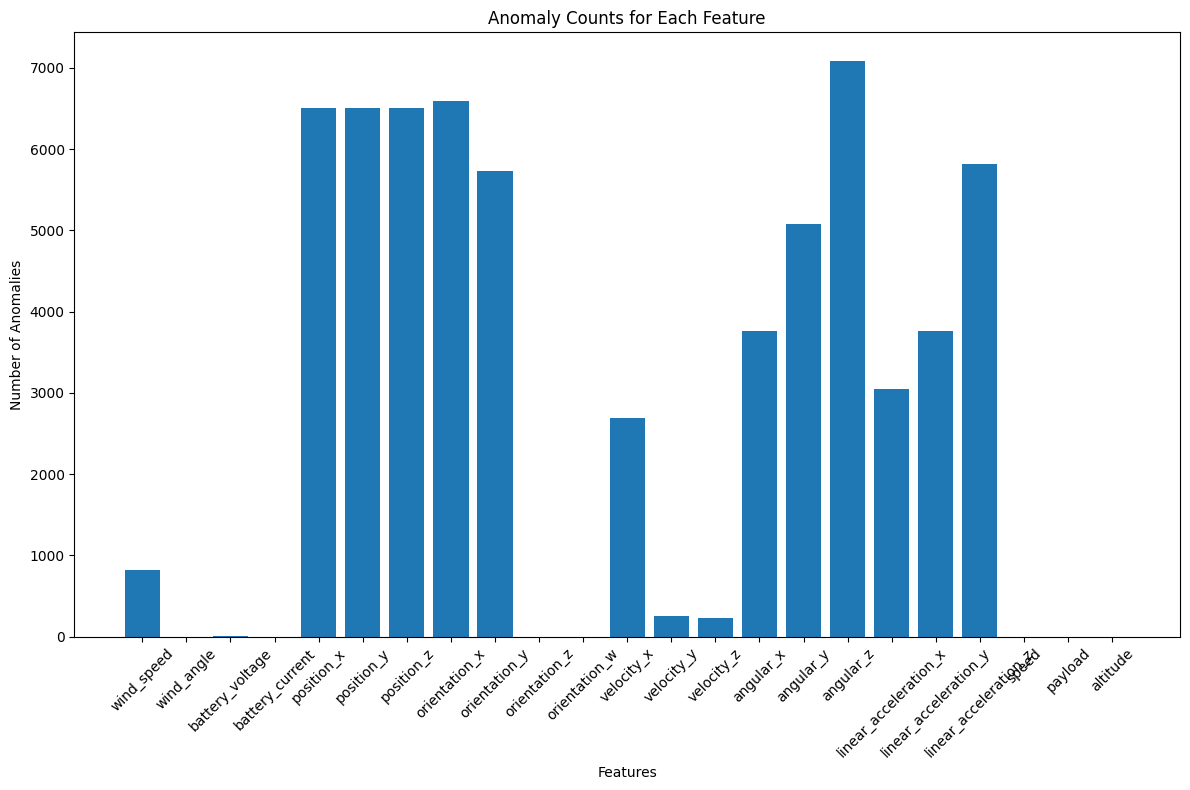

In [30]:
# Create a bar plot of anomaly counts using Matplotlib
plt.figure(figsize=(12, 8))
bars = plt.bar(anomaly_counts.index, anomaly_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Number of Anomalies')
plt.title('Anomaly Counts for Each Feature')
plt.tight_layout()
plt.show()

In [31]:
# Select pairs of features for scatter plots
scatter_pairs = [('wind_speed', 'wind_angle'),
                 ('battery_voltage', 'battery_current'),
                 ('velocity_x', 'velocity_y'),
                 ('angular_x', 'angular_y'),
                 ('linear_acceleration_x', 'linear_acceleration_y')]

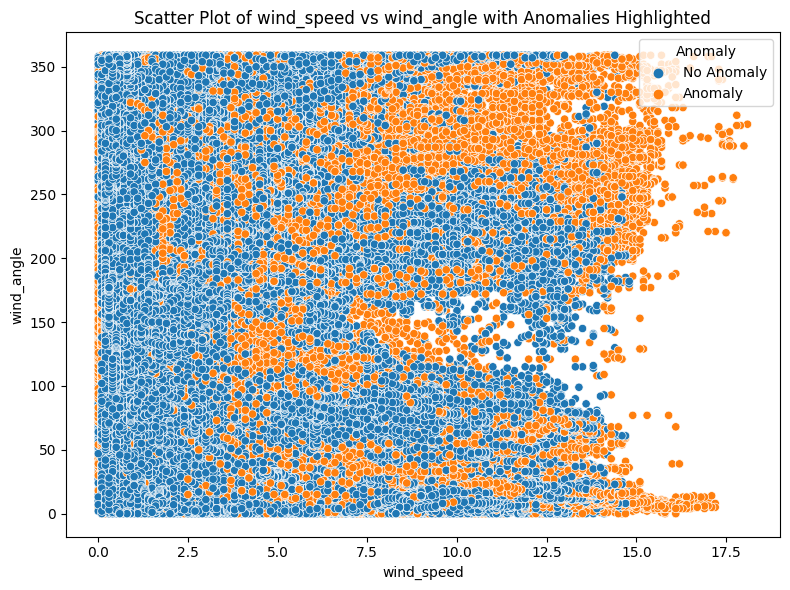

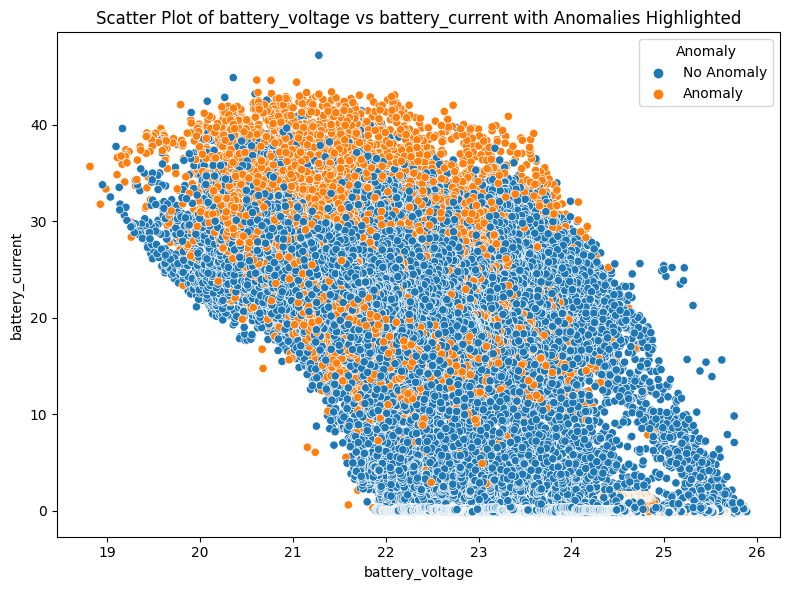

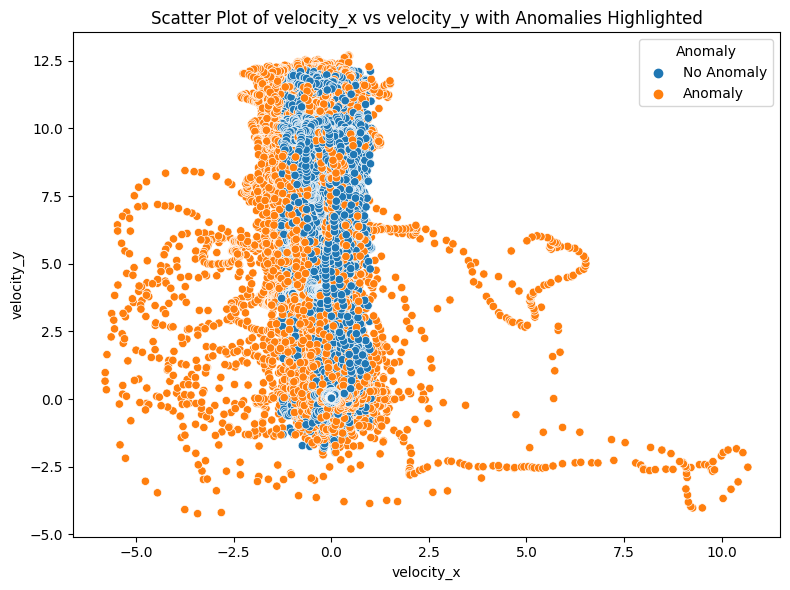

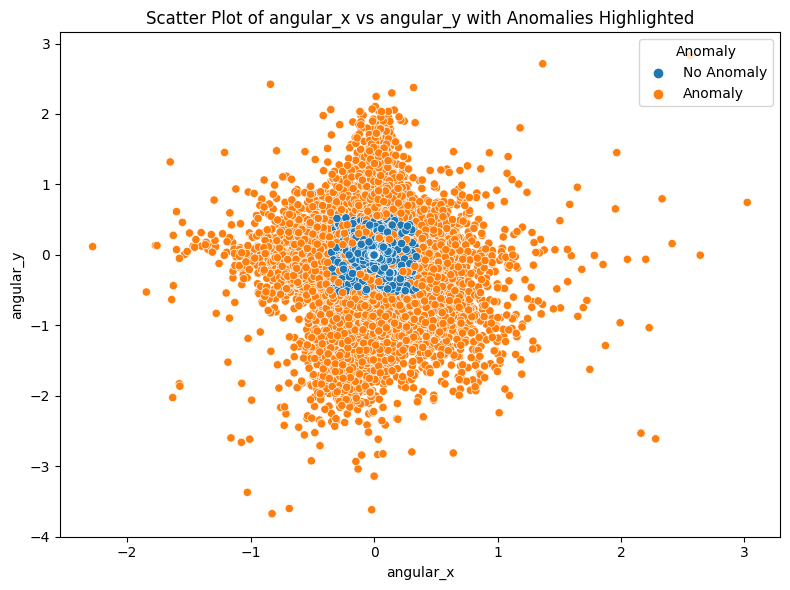

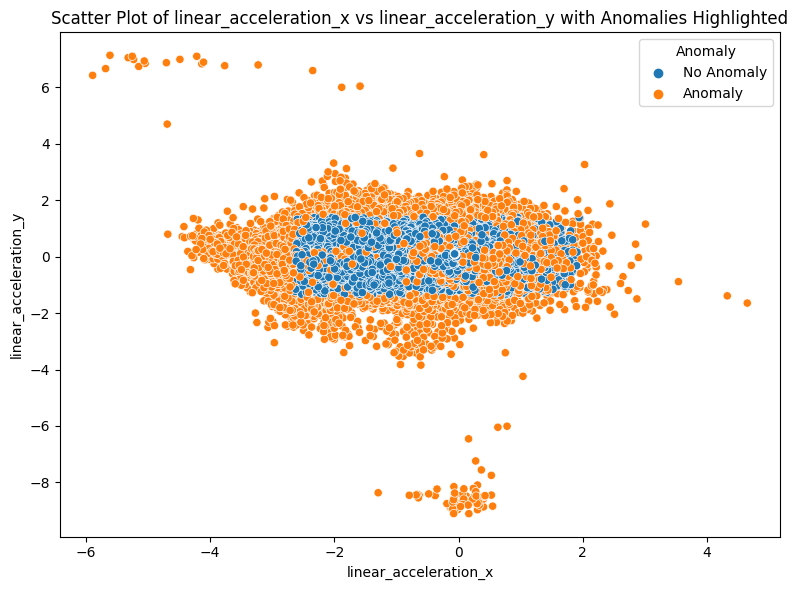

In [32]:
# Create scatter plot graphs for selected scatter plots with anomalies highlighted
for pair in scatter_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue=anomalies.any(axis=1))
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]} with Anomalies Highlighted')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Manually create the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.gca().legend(handles, ['No Anomaly', 'Anomaly'], title='Anomaly', loc='upper right')

    plt.tight_layout()
    plt.show()